# Cyrillic Text Recognition - AVA Classifier with SVMs by Chris McLaughlin
# Group: Chris, Owen, Christian

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/
%cd "drive/MyDrive/SENG474/Final Project CHRIS/DATASET"
!ls

Mounted at /content/drive
/content
/content/drive/MyDrive/SENG474/Final Project CHRIS/DATASET
Cyrillic_Images  dataX.csv  datay.csv


In [3]:
# Immport data
X = np.loadtxt("dataX.csv", delimiter=",")
y = np.genfromtxt("datay.csv", dtype="str")

In [4]:
chars, counts = np.unique(y, return_counts=True)
# Map chars to ints in interval [0,number_of_lables] 
mapping_dict = dict(zip(chars, [x for x in range(chars.size)]))
mapping_dict_backwards = dict(zip([x for x in range(chars.size)], chars)) #may be needed later

y = np.vectorize(mapping_dict.get)(y).astype("uint8")
X = X/255

Lets test a variety of hyper paramaters.

In [5]:
num_tests = 1
kernals = ['rbf','linear', 'poly', 'sigmoid', 'precomputed']
c_vals = [1, 5, 10, 20, 50] #first batch [.05, .1, .7, 1] lead to wanting to try more, will later concat data frames to analyze full batch
results_df = pd.DataFrame(index=range(num_tests*len(kernals)), columns=["kernal", "reg_param", "validation_accuracy", "training_time"])

i = 0
errors = 0
print("models completed:")
for test in range(num_tests):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    for kern in kernals:
        for c in c_vals:
            try:
                ava_model = OneVsOneClassifier(SVC(C=c, kernel=kern))

                start = time.time()
                ava_model.fit(X_train, y_train)
                end = time.time()

                results_df.loc[i] = [kern, c, np.sum(ava_model.predict(X_test) == y_test)/y_test.shape[0], end-start]
                i += 1
        
                print(str(i+1)+'/'+str(num_tests * len(kernals) * len(c_vals)), end=" ")
            except:
                errors += 1

models completed:
2/25 3/25 4/25 5/25 6/25 7/25 8/25 9/25 10/25 11/25 12/25 13/25 14/25 15/25 16/25 17/25 18/25 19/25 20/25 21/25 

Training resulted in 4 errors, always use try/axcept :)

In [6]:
# hyper params in str form
results_df['param_as_str'] = results_df.apply(lambda x: '('+str(x['kernal'])+', '+str(x['reg_param'])+')', axis=1)

Text(0.5, 0, 'Hyper Params')

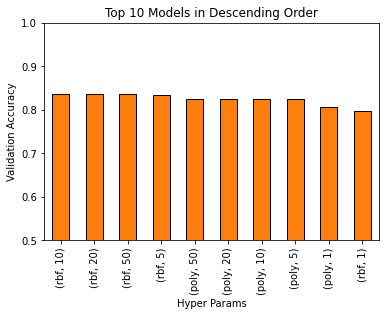

In [7]:
# lets plot the top val accuracy of top models
bars = 10 #configuration variable
results_df.sort_values(by=['validation_accuracy'], ascending = False).head(bars).plot.bar(x='param_as_str', y='validation_accuracy', color='tab:orange', legend=None, edgecolor = "black")
plt.ylim(.5,1)
plt.title('Top '+str(min(bars, results_df.shape[0]))+' Models in Descending Order')
plt.ylabel('Validation Accuracy')
plt.xlabel('Hyper Params')

It appears we may want to try greater regularization paramaters to reach a more optimal model. Different kernals perform better with small regularization paramaters while others with greater. Lets investigate further.

Text(0.5, 0, 'Regularization Paramater')

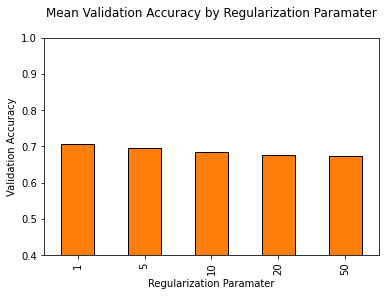

In [8]:
results_df.groupby(["reg_param"])["validation_accuracy"].mean().squeeze().sort_values(ascending = False).plot.bar(color='tab:orange', edgecolor = "black")
plt.ylim(.4,1)
plt.title("Mean Validation Accuracy by Regularization Paramater\n")
plt.ylabel("Validation Accuracy")
plt.xlabel("Regularization Paramater")

Text(0.5, 0, 'Kernal')

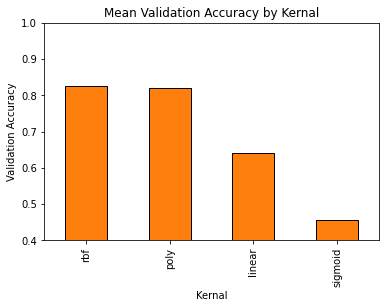

In [9]:
results_df.groupby(["kernal"])["validation_accuracy"].mean().squeeze().sort_values(ascending = False).plot.bar(color='tab:orange', edgecolor = "black")
plt.ylim(.4,1)
plt.title("Mean Validation Accuracy by Kernal")
plt.ylabel("Validation Accuracy")
plt.xlabel("Kernal")

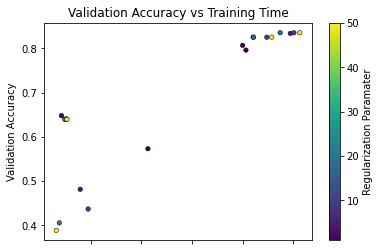

In [10]:
ax = results_df.plot.scatter(x='training_time', y='validation_accuracy', c="reg_param", colormap='viridis', edgecolors='black', linewidths=0.5)
ax.set_title('Validation Accuracy vs Training Time')
ax.set_xlabel('Training Time')
ax.set_ylabel('Validation Accuracy')
colorbar = ax.collections[0].colorbar
colorbar.set_label('Regularization Paramater')